In [2]:
#import pandas and data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/eda.csv')

In [3]:
#initial look at data frame
df.describe()
df.info()
df.head()
df['zipcode'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

70

Cleaning the data to pick 3 most relevant properties

In [4]:
df.isna().sum()
df['date'].unique()
df['sqft_lot'].min()

520.0

In [5]:
#drop columns where data is irrelevant for client
df2 = df.drop(columns=['bedrooms','view','yr_renovated','date','price','id','sqft_basement','floors'])
#add column for open yard space usable for golf/tennis course, pool
df2['sqft_open'] = df['sqft_lot'] - df['sqft_living']
df2.describe()


,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_id,id.1,sqft_open
count,21597.000000,21597.000000,2.159700e+04,19206.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,2.159700e+04
mean,2.115826,2080.321850,1.509941e+04,0.007602,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,4.580474e+09,10799.000000,1.301909e+04
std,0.768984,918.106125,4.141264e+04,0.086858,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,2.876736e+09,6234.661218,4.126330e+04
min,0.500000,370.000000,5.200000e+02,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000102e+06,1.000000,-1.900000e+03
25%,1.750000,1430.000000,5.040000e+03,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2.123049e+09,5400.000000,3.095000e+03
50%,2.250000,1910.000000,7.618000e+03,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,3.904930e+09,10799.000000,5.710000e+03
75%,2.500000,2550.000000,1.068500e+04,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,7.308900e+09,16198.000000,8.662000e+03
max,8.000000,13540.000000,1.651359e+06,1.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,9.900000e+09,21597.000000,1.650059e+06


<Axes: ylabel='yr_built'>

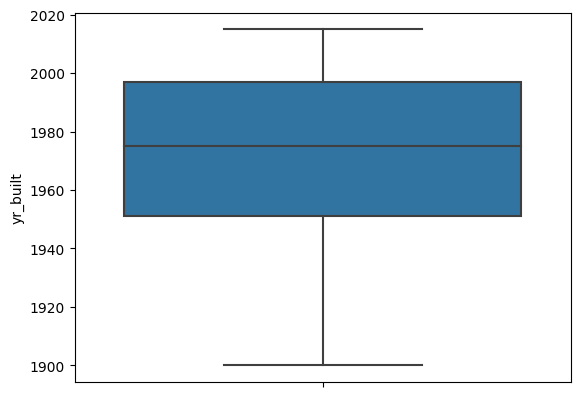

In [6]:
#box plot to visualize distribution of properties by year built
import seaborn as sns
sns.boxplot(data=df2, y='yr_built')

In [7]:
#exclude all houses with yr_built above lower quartile range
df2 = df2[df2.yr_built <= 1965]
#exclude all houses on waterfront
df2 = df2[df2.waterfront != 1]
df2.reset_index()


,index,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_id,id.1,sqft_open
0,0,1.00,1180.0,5650.0,NaN,3,7,1180.0,1955,98178,47.5112,-122.257,1340.0,5650.0,7129300520,1,4470.0
1,1,2.25,2570.0,7242.0,0.0,3,7,2170.0,1951,98125,47.7210,-122.319,1690.0,7639.0,6414100192,2,4672.0
2,2,1.00,770.0,10000.0,0.0,3,6,770.0,1933,98028,47.7379,-122.233,2720.0,8062.0,5631500400,3,9230.0
3,3,3.00,1960.0,5000.0,0.0,5,7,1050.0,1965,98136,47.5208,-122.393,1360.0,5000.0,2487200875,4,3040.0
4,7,1.50,1060.0,9711.0,0.0,3,7,1060.0,1963,98198,47.4095,-122.315,1650.0,9711.0,2008000270,8,8651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,21287,1.00,1150.0,18200.0,0.0,5,7,1150.0,1959,98058,47.4262,-122.187,1714.0,18200.0,522059130,21288,17050.0
8695,21316,1.00,390.0,2000.0,0.0,4,6,390.0,1920,98103,47.6938,-122.347,1340.0,5100.0,9266700190,21317,1610.0
8696,21327,1.50,2580.0,47480.0,0.0,3,7,1360.0,1953,98024,47.5333,-121.933,1760.0,48181.0,2924079034,21328,44900.0
8697,21454,1.00,1030.0,24750.0,0.0,3,5,1030.0,1943,98023,47.3343,-122.362,2810.0,28800.0,121039156,21455,23720.0


In [8]:
#size of mini golf course ranges from 3 000 - 20 000 sqft (mean = 11 500)
#avg size of tennis course is 2 809 sqft
#avg size of a home pool is around 500 sqft
#exclude all houses with insufficient open space for golf + tennis course + pool
df3 = df2[df2.sqft_lot >= 15000]
df3.reset_index()
df3.describe()

,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_id,id.1,sqft_open
count,883.000000,883.000000,8.830000e+02,782.0,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,8.830000e+02,883.000000,8.830000e+02
mean,1.854190,2121.710079,5.008707e+04,0.0,3.595696,7.242356,1736.745187,1948.189128,98069.946772,47.523349,-122.197257,2119.643262,32219.875425,3.619761e+09,10087.454134,4.796536e+04
std,0.832254,1035.065902,9.814911e+04,0.0,0.769798,1.266226,769.220971,15.002548,62.186069,0.150876,0.152636,670.998965,49211.752344,2.687870e+09,5844.387919,9.822468e+04
min,0.750000,380.000000,1.500000e+04,0.0,1.000000,4.000000,380.000000,1900.000000,98001.000000,47.155900,-122.509000,800.000000,1863.000000,1.200019e+06,13.000000,1.022900e+04
25%,1.000000,1393.000000,1.778850e+04,0.0,3.000000,7.000000,1220.000000,1941.000000,98023.000000,47.421300,-122.303000,1620.000000,11262.500000,1.523079e+09,4867.500000,1.556700e+04
50%,1.750000,1950.000000,2.286000e+04,0.0,4.000000,7.000000,1570.000000,1953.000000,98045.000000,47.502900,-122.218000,2000.000000,16200.000000,3.204500e+09,9940.000000,2.069000e+04
75%,2.500000,2655.000000,4.178200e+04,0.0,4.000000,8.000000,2060.000000,1959.000000,98125.000000,47.636850,-122.115000,2505.000000,28225.000000,5.456100e+09,15171.000000,3.927600e+04
max,8.000000,12050.000000,1.651359e+06,0.0,5.000000,13.000000,8570.000000,1965.000000,98199.000000,47.777100,-121.315000,5500.000000,425581.000000,9.809000e+09,21455.000000,1.650059e+06


In [9]:
#narrow down data frame to entries that meet all of client's criteria (1)
df_old = df[df.yr_built <= 1965]
df_old['sqft_open'] = df_old['sqft_lot'] - df_old['sqft_above']
df_old_big = df_old[df_old.sqft_lot >= 15000]
df_old['sqft_lot'].mean()


C:\Users\david\AppData\Local\Temp\ipykernel_2104\2882582594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['sqft_open'] = df_old['sqft_lot'] - df_old['sqft_above']


11515.989866788113

In [10]:
#narrow down data frame to entries that meet all of client's criteria (2)
df_4bath = df[df.bathrooms >= 4]
df_big4 = df_4bath[df_4bath.sqft_lot >= 15000]
df_big4_nowf = df_big4[df_big4.waterfront == 0]

In [11]:
#narrow down data frame to entries that meet all of client's criteria (3)
df_old['sqft_open'].mean()
df_old_nowf = df_old[df_old.waterfront == 0]
df_old_nowf['waterfront'].unique()
df_old_nowf_4b = df_old_nowf[df_old_nowf.bathrooms >= 4]
df_final = df_old_nowf_4b[df_old_nowf_4b.sqft_open >= 15000]


In [12]:
#drop unwanted columns
df_final.reset_index()
df_final = df_final.drop(columns=['view','id','sqft_basement'])


In [13]:
#initial look at final data frame and re-sorting
#pick 3 most relevant properties as recommendations for client (see presentation slides)
df_final.info()
df_final = df_final.sort_values(by=['yr_built', 'sqft_lot'])
df_final.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 3018 to 19445
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       13 non-null     float64
 1   bathrooms      13 non-null     float64
 2   sqft_living    13 non-null     float64
 3   sqft_lot       13 non-null     float64
 4   floors         13 non-null     float64
 5   waterfront     13 non-null     float64
 6   condition      13 non-null     int64  
 7   grade          13 non-null     int64  
 8   sqft_above     13 non-null     float64
 9   yr_built       13 non-null     int64  
 10  yr_renovated   10 non-null     float64
 11  zipcode        13 non-null     int64  
 12  lat            13 non-null     float64
 13  long           13 non-null     float64
 14  sqft_living15  13 non-null     float64
 15  sqft_lot15     13 non-null     float64
 16  date           13 non-null     object 
 17  price          13 non-null     float64
 18  house_id   

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,sqft_open
5961,4.0,4.25,6410.0,43838.0,2.5,0.0,4,12,5610.0,1906,...,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,5249800010,5962,38228.0
7245,6.0,8.00,12050.0,27600.0,2.5,0.0,4,13,8570.0,1910,...,98102,47.6298,-122.323,3940.0,8800.0,2014-10-13,7700000.0,6762700020,7246,19030.0
18711,5.0,4.50,3540.0,21217.0,2.0,0.0,4,8,2940.0,1926,...,98188,47.4274,-122.280,1290.0,12040.0,2015-01-05,707000.0,239000155,18712,18277.0
18314,4.0,4.75,4575.0,24085.0,2.5,0.0,5,10,3905.0,1926,...,98112,47.6263,-122.284,3900.0,9687.0,2014-07-11,2920000.0,5317100750,18315,20180.0
15152,4.0,4.00,3860.0,67953.0,2.0,0.0,4,12,3860.0,1927,...,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,3304700130,15153,64093.0
14172,3.0,4.00,4200.0,30120.0,2.0,0.0,4,11,3600.0,1933,...,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,1333300145,14173,26520.0
3314,4.0,4.25,2360.0,57514.0,2.0,0.0,4,8,2360.0,1939,...,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,2821049048,3315,55154.0
3018,4.0,5.50,6930.0,45100.0,1.0,0.0,4,11,4310.0,1950,...,98006,47.5547,-122.144,2560.0,37766.0,2014-09-29,2530000.0,3377900195,3019,40790.0
19445,6.0,4.50,4520.0,40164.0,2.0,0.0,3,9,3580.0,1953,...,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,722059020,19446,36584.0
4020,7.0,6.75,7480.0,41664.0,2.0,0.0,3,11,5080.0,1953,...,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,9175600025,4021,36584.0


Analyzing the data to find insights for client

In [14]:
#add necessary columns for final analysis for client
#use data frame with properties of all sizes for analytic purposes
###df_old_nowf['area_ratio'] = df_old_nowf['sqft_open']/df_old_nowf['sqft_above']
df_old_nowf_4b['sqft_open'] = df_old_nowf_4b['sqft_lot'] - df_old_nowf_4b['sqft_above']
df_old_nowf_4b['area_ratio'] = df_old_nowf_4b['sqft_above']/df_old_nowf_4b['sqft_open']
df_old_nowf_4b['price_per_sq'] = df_old_nowf_4b['price']/df_old_nowf_4b['sqft_lot']
df_old_nowf_4b['Area ratio'] = np.where(df_old_nowf_4b['area_ratio']>= 0.5, 'House > Yard', 'Yard > House')


C:\Users\david\AppData\Local\Temp\ipykernel_2104\1823593766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_nowf_4b['sqft_open'] = df_old_nowf_4b['sqft_lot'] - df_old_nowf_4b['sqft_above']
C:\Users\david\AppData\Local\Temp\ipykernel_2104\1823593766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_nowf_4b['area_ratio'] = df_old_nowf_4b['sqft_above']/df_old_nowf_4b['sqft_open']
C:\Users\david\AppData\Local\Temp\ipykernel_2104\1823593766.py:6: SettingWithCopyWarning: 
A value is trying to 

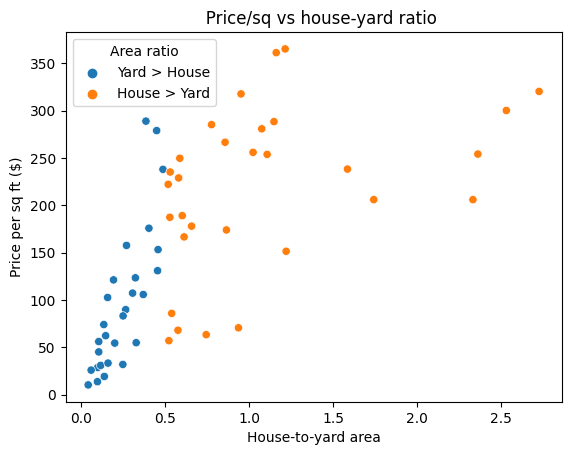

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  
#scatterplot of price per sqft variation by area ratio
sns.scatterplot(data=df_old_nowf_4b, x='area_ratio', y='price_per_sq', hue = 'Area ratio')


#add plot title and labels
plt.title('''   Price/sq vs house-yard ratio''')
plt.xlabel("House-to-yard area")
plt.ylabel("Price per sq ft ($)")
plt.show()

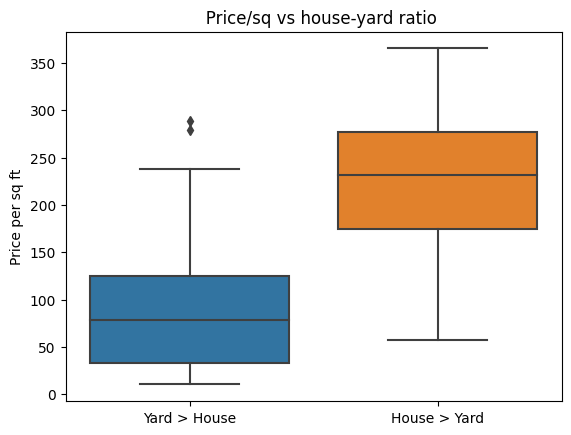

In [16]:
#boxplot to show distribution of above scatterplot
sns.boxplot(data=df_old_nowf_4b, y='price_per_sq', x='Area ratio')

#add plot title and labels
plt.title('''   Price/sq vs house-yard ratio''')
plt.xlabel("")
plt.ylabel("Price per sq ft")
plt.show()

In [17]:
#add columns for final analysis to initial data frame
df['sqft_gdfl'] = df['sqft_above']/df['floors']
df['sqft_open'] = df['sqft_lot'] - df['sqft_gdfl']
df['area_ratio'] = df['sqft_gdfl']/df['sqft_open']
df['price_per_sq'] = df['price']/df['sqft_lot']
df['House-yard ratio'] = np.where(df['area_ratio']>= 0.5, 'More house than yard', 'Less house than yard')

In [19]:
df.sort_values(by=['sqft_lot'], ascending=False)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,house_id,id.1,sqft_gdfl,sqft_open,area_ratio,price_per_sq,House-yard ratio
1717,1020069017,4.0,1.00,1300.0,1651359.0,1.0,0.0,3.0,4,6,...,425581.0,2015-03-27,700000.0,1020069017,1718,1300.000000,1.650059e+06,0.000788,0.423893,Less house than yard
17305,3326079016,2.0,1.00,710.0,1164794.0,1.0,0.0,0.0,2,5,...,16730.0,2015-05-04,190000.0,3326079016,17306,710.000000,1.164084e+06,0.000610,0.163119,Less house than yard
7640,2623069031,5.0,3.25,3010.0,1074218.0,1.5,NaN,0.0,5,8,...,68825.0,2014-05-21,542500.0,2623069031,7641,1340.000000,1.072878e+06,0.001249,0.505019,Less house than yard
7762,2323089009,4.0,3.50,4030.0,1024068.0,2.0,0.0,0.0,3,10,...,11700.0,2015-01-19,855000.0,2323089009,7763,2015.000000,1.022053e+06,0.001972,0.834905,Less house than yard
3945,722069232,4.0,3.25,3770.0,982998.0,2.0,0.0,0.0,3,10,...,37141.0,2014-09-05,998000.0,722069232,3946,1885.000000,9.811130e+05,0.001921,1.015261,Less house than yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,7899800857,2.0,2.00,1070.0,635.0,2.0,0.0,0.0,3,9,...,928.0,2014-12-15,256950.0,7899800857,20589,360.000000,2.750000e+02,1.309091,404.645669,More house than yard
3449,2559950110,2.0,2.50,2470.0,609.0,3.0,0.0,0.0,3,11,...,1229.0,2015-04-22,1230000.0,2559950110,3450,636.666667,-2.766667e+01,-23.012048,2019.704433,Less house than yard
7582,6371000026,2.0,2.00,1030.0,600.0,2.0,NaN,0.0,3,8,...,1267.0,2015-01-22,367500.0,6371000026,7583,340.000000,2.600000e+02,1.307692,612.500000,More house than yard
5821,1773101159,3.0,2.25,1050.0,572.0,2.0,0.0,0.0,3,7,...,1062.0,2015-01-07,250000.0,1773101159,5822,370.000000,2.020000e+02,1.831683,437.062937,More house than yard


In [22]:
#create new df by grouping by year built
df_gb = df.groupby(['condition','yr_built']).count()
df_yrs = df_gb.reset_index()
df_yrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   condition         419 non-null    int64
 1   yr_built          419 non-null    int64
 2   id                419 non-null    int64
 3   bedrooms          419 non-null    int64
 4   bathrooms         419 non-null    int64
 5   sqft_living       419 non-null    int64
 6   sqft_lot          419 non-null    int64
 7   floors            419 non-null    int64
 8   waterfront        419 non-null    int64
 9   view              419 non-null    int64
 10  grade             419 non-null    int64
 11  sqft_above        419 non-null    int64
 12  sqft_basement     419 non-null    int64
 13  yr_renovated      419 non-null    int64
 14  zipcode           419 non-null    int64
 15  lat               419 non-null    int64
 16  long              419 non-null    int64
 17  sqft_living15     419 non-null    i

C:\Users\david\AppData\Local\Temp\ipykernel_2104\985582457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big4_nowf['Renovation'] = np.where(df_big4_nowf['yr_renovated']>=0, 'Renovated', 'Not Renovated')


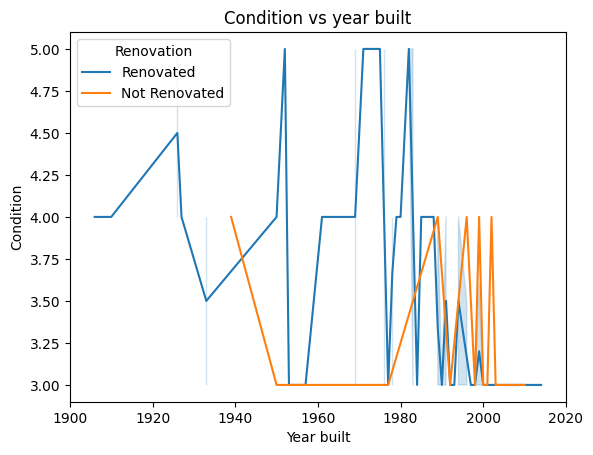

In [23]:
#add binary column with renovation status
df_big4_nowf['Renovation'] = np.where(df_big4_nowf['yr_renovated']>=0, 'Renovated', 'Not Renovated')

#lineplot to show variation of property condition across time (year built)
#distinguish between renovated and unrenovated properties as Hue
sns.lineplot(data=df_big4_nowf, y='condition', x='yr_built', hue = 'Renovation')

#set x-axis range
lowest_value = 1900
max_value = 2020
plt.xlim(lowest_value, max_value)

#add plot title and labels
plt.title('''Condition vs year built''')
plt.xlabel("Year built")
plt.ylabel("Condition")
plt.show()

In [27]:
#add columns with ratio of living area per bedroom and per bathroom
df_old_nowf['bedroom_ratio']=df_old_nowf['sqft_living']/df_old_nowf['bedrooms']
df_old_nowf['bathroom_ratio']=df_old_nowf['sqft_living']/df_old_nowf['bathrooms']



C:\Users\david\AppData\Local\Temp\ipykernel_2104\1467544470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_nowf['bedroom_ratio']=df_old_nowf['sqft_living']/df_old_nowf['bedrooms']
C:\Users\david\AppData\Local\Temp\ipykernel_2104\1467544470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_nowf['bathroom_ratio']=df_old_nowf['sqft_living']/df_old_nowf['bathrooms']


In [28]:
df_onw_big = df_old_nowf[df_old_nowf.sqft_open >= 15000]

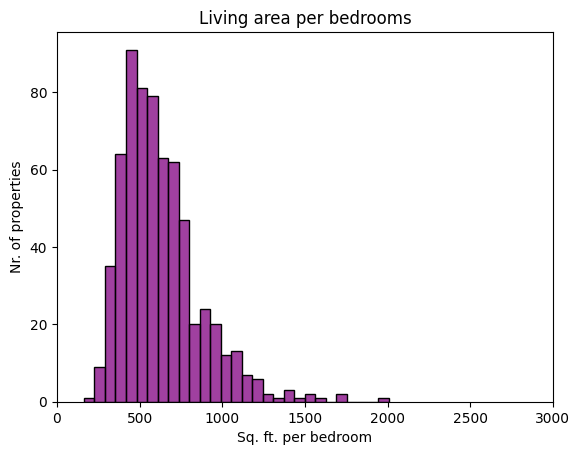

In [29]:
#histogram with distribution of properties according to area per bedroom
sns.histplot(data=df_onw_big, x='bedroom_ratio',color='purple')

###sns.despine() - to remove top and right axes/frames

#set x-axis range
lowest_xvalue = 0  # Set the lowest temperature value on the y-axis
max_xvalue = 3000  # Set the maximum temperature value on the y-axis
plt.xlim(lowest_xvalue, max_xvalue)

#add plot title and labels
plt.title('''Living area per bedrooms''')
plt.xlabel("Sq. ft. per bedroom")
plt.ylabel("Nr. of properties")
plt.show()

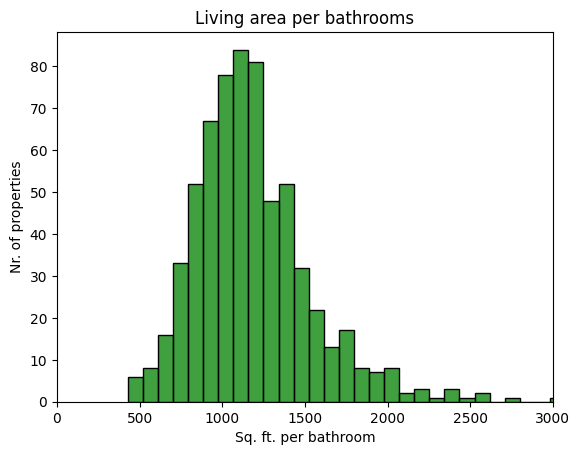

In [30]:
#histogram with distribution of properties according to area per bathroom
sns.histplot(data=df_onw_big, x='bathroom_ratio', color='green')

#set y-axis range
lowest_xvalue = 0  # Set the lowest temperature value on the y-axis
max_xvalue = 3000  # Set the maximum temperature value on the y-axis
plt.xlim(lowest_xvalue, max_xvalue)

#add plot title and labels
plt.title('''Living area per bathrooms''')
plt.xlabel("Sq. ft. per bathroom")
plt.ylabel("Nr. of properties")
plt.show()